<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/test_goldnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
mfc_pr=np.array([3079.34013231, 3190.4695831 , 3301.59903388, 3412.72848466,
       3523.85793545, 3634.98738623])

In [3]:
bc_pr=np.array([3297.45293571, 3286.33840017, 3272.65924412, 3256.73271559,
       3239.12888192, 3219.0022132 , 3201.75159963, 3189.03426173,
       3172.90833836, 3162.82653631, 3148.57599656, 3135.95501795,
       3119.65338334, 3110.3027253 , 3092.52341303, 3079.09063901,
       3068.64018172, 3057.61392417, 3044.78366554, 3029.87590555,
       3013.31790199, 2996.90103584, 2986.12808611, 2979.13799858,
       2968.02031194, 2957.43202652, 2942.78043726, 2927.56401841,
       2916.95777741, 2900.32296927])

In [4]:
gold_dta=yf.download('GC=F',period='max',interval='1d')

/tmp/ipython-input-4-2892297340.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_dta=yf.download('GC=F',period='max',interval='1d')
[*********************100%***********************]  1 of 1 completed


In [5]:
gold_dta.tail()

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2025-07-18,3353.000000,3353.000000,3338.199951,3338.199951,602
2025-07-21,3401.899902,3411.699951,3350.300049,3350.300049,53
2025-07-22,3439.199951,3441.000000,3395.600098,3411.000000,39
2025-07-23,3394.100098,3433.899902,3388.100098,3430.300049,39
2025-07-24,3361.600098,3401.100098,3355.199951,3398.600098,111584


In [6]:
gold_dta.loc["2025-07-07":,:]

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2025-07-07,3332.199951,3333.300049,3299.199951,3305.500000,254
2025-07-08,3307.000000,3334.500000,3287.600098,3330.399902,909
2025-07-09,3311.600098,3314.000000,3282.000000,3289.399902,114
2025-07-10,3317.399902,3330.500000,3311.600098,3323.600098,209
2025-07-11,3356.000000,3370.000000,3330.500000,3330.500000,776
2025-07-14,3351.500000,3375.500000,3350.000000,3367.000000,583
2025-07-15,3329.800049,3341.000000,3329.800049,3341.000000,210
2025-07-16,3352.500000,3352.899902,3329.500000,3341.199951,10


In [7]:
close_real=gold_dta.loc["2025-07-07":,"Close"].values.reshape(1,-1)[0]

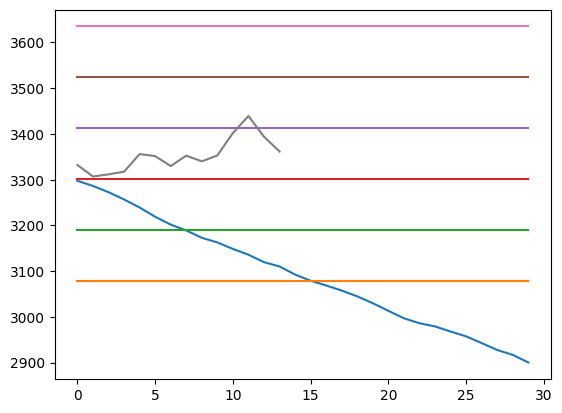

In [8]:
plt.plot(bc_pr)
plt.plot([mfc_pr[0]]*30)
plt.plot([mfc_pr[1]]*30)
plt.plot([mfc_pr[2]]*30)
plt.plot([mfc_pr[3]]*30)
plt.plot([mfc_pr[4]]*30)
plt.plot([mfc_pr[5]]*30)
plt.plot(close_real)
plt.show()